In [4]:
import pandas as pd

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
                      'machine-learning-databases/wine/wine.data',
                      header=None)

# UCI 머신 러닝 저장소에서 Wine 데이터셋을 다운로드할 수 없을 때
# 다음 주석을 해제하고 로컬 경로에서 데이터셋을 적재하세요:

# df_wine = pd.read_csv('wine.data', header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']

df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
np.set_printoptions(precision=4)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

In [7]:
# stratify=y으로 한 경우

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3,
                     stratify=y,
                     random_state=0)

In [9]:
# 선형 판별 분석의 내부 동작 방식

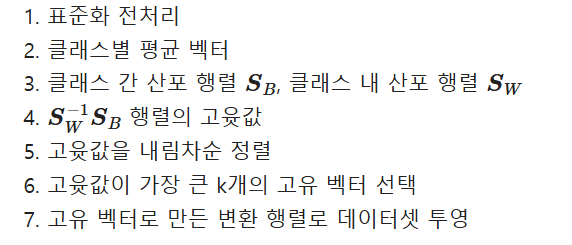

In [8]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [10]:
np.mean(X_train_std[y_train == 1])

np.float64(0.3985078731373084)

In [11]:
mean_vecs = []
for label in range(1, 4):
    mean_vecs.append(np.mean(X_train_std[y_train == label], axis=0))
    print('MV %s: %s\n' % (label, mean_vecs[label - 1]))

MV 1: [ 0.9066 -0.3497  0.3201 -0.7189  0.5056  0.8807  0.9589 -0.5516  0.5416
  0.2338  0.5897  0.6563  1.2075]

MV 2: [-0.8749 -0.2848 -0.3735  0.3157 -0.3848 -0.0433  0.0635 -0.0946  0.0703
 -0.8286  0.3144  0.3608 -0.7253]

MV 3: [ 0.1992  0.866   0.1682  0.4148 -0.0451 -1.0286 -1.2876  0.8287 -0.7795
  0.9649 -1.209  -1.3622 -0.4013]



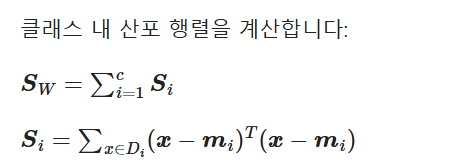

In [12]:
d = 13 # 특성의 수
S_W = np.zeros((d, d))

In [13]:
for label, mv in zip(range(1, 4), mean_vecs):
    class_scatter = np.zeros((d, d))  # 각 클래스에 대한 산포 행렬
    for row in X_train_std[y_train == label]:
        row, mv = row.reshape(d, 1), mv.reshape(d, 1)  # 열 벡터를 만듭니다
        class_scatter += (row - mv).dot((row - mv).T)
    S_W += class_scatter                          # 클래스 산포 행렬을 더합니다

In [14]:
print('클래스 내의 산포 행렬: %sx%s' % (S_W.shape[0], S_W.shape[1]))

클래스 내의 산포 행렬: 13x13


In [15]:
# 클래스가 균일하게 분포되어 있지 않기 때문에 공분산 행렬을 사용하는 것이 더 낫습니다:

In [16]:

print('클래스 레이블 분포: %s'
      % np.bincount(y_train)[1:])

클래스 레이블 분포: [41 50 33]


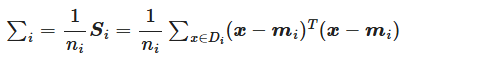

In [18]:
X_train_std[y_train == 1].T

array([[ 0.8823,  0.8459,  0.5787,  1.028 ,  0.02  ,  0.7851,  1.3195,
         1.2466,  0.6394,  1.5381,  0.02  ,  0.4329,  0.1536,  2.1818,
         1.6353,  0.3236,  0.8216,  0.3115,  1.1009,  1.441 ,  0.7244,
         0.2507,  1.4167,  0.9673,  0.2507,  2.0847,  1.0159,  0.5422,
         0.8337,  1.2952,  0.9552,  1.6353,  0.4572,  0.02  ,  1.2466,
         0.9673,  0.6394,  1.1981,  0.6637,  1.4045,  1.2952],
       [-0.7046, -0.7302, -0.4736, -0.3967, -0.6019, -0.448 , -0.7473,
        -0.1743, -0.5506, -0.371 , -0.2598, -0.4993,  0.0053, -0.6105,
         1.0573, -0.5421, -0.4223, -0.3282, -0.5335, -0.5592, -0.4651,
         1.3909, -0.5079, -0.6704,  0.202 , -0.5335, -0.3881, -0.4651,
        -0.7901, -0.1657, -0.5164, -0.4138,  1.2711, -0.5335, -0.619 ,
        -0.6019, -0.5335, -0.5763, -0.5934, -0.6533, -0.2855],
       [ 1.1753,  1.1753,  0.9888,  0.765 ,  0.6158, -0.093 , -0.2422,
         0.8396, -0.2795,  1.2499,  3.1151,  0.8769,  1.0634, -0.8017,
        -0.3914, -0.91

In [19]:
np.cov(X_train_std[y_train == 1].T)

array([[ 0.2886, -0.0464, -0.1252, -0.1924,  0.0101,  0.103 ,  0.0818,
         0.0043,  0.0934,  0.0862,  0.0745,  0.0139,  0.1072],
       [-0.0464,  0.2434, -0.0555,  0.0386, -0.0536, -0.0332, -0.0395,
         0.0065, -0.0308, -0.0884, -0.1039,  0.0271, -0.1192],
       [-0.1252, -0.0555,  0.7511,  0.427 ,  0.2947,  0.0103, -0.0109,
         0.2612, -0.1337, -0.077 ,  0.0995, -0.0353, -0.0354],
       [-0.1924,  0.0386,  0.427 ,  0.6471,  0.2388, -0.1485, -0.127 ,
         0.1338, -0.1733, -0.1331,  0.0128, -0.0397, -0.1243],
       [ 0.0101, -0.0536,  0.2947,  0.2388,  0.5368,  0.1115,  0.0108,
         0.1744, -0.0941,  0.0604,  0.0182,  0.0397, -0.0756],
       [ 0.103 , -0.0332,  0.0103, -0.1485,  0.1115,  0.2977,  0.1806,
        -0.0056,  0.1279,  0.1742, -0.0389,  0.0261,  0.0817],
       [ 0.0818, -0.0395, -0.0109, -0.127 ,  0.0108,  0.1806,  0.1693,
        -0.0222,  0.1555,  0.1638,  0.0182, -0.008 ,  0.1106],
       [ 0.0043,  0.0065,  0.2612,  0.1338,  0.1744, -0.0056, 

In [20]:
np.cov(X_train_std[y_train == 1].T).shape

(13, 13)

In [21]:
d = 13  # 특성의 수
S_W = np.zeros((d, d))
for label, mv in zip(range(1, 4), mean_vecs):
    class_scatter = np.cov(X_train_std[y_train == label].T)
    S_W += class_scatter
print('스케일 조정된 클래스 내의 산포 행렬: %sx%s' %
      (S_W.shape[0], S_W.shape[1]))

스케일 조정된 클래스 내의 산포 행렬: 13x13


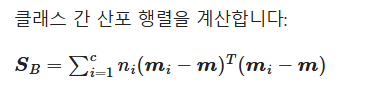

In [24]:
mean_overall = np.mean(X_train_std, axis=0)
mean_overall = mean_overall.reshape(d, 1)  # 열 벡터로 만들기
d = 13  # 특성 개수
S_B = np.zeros((d, d))
for i, mean_vec in enumerate(mean_vecs):
    n = X_train_std[y_train == i + 1, :].shape[0]
    mean_vec = mean_vec.reshape(d, 1)  # 열 벡터로 만들기
    S_B += n * (mean_vec - mean_overall).dot((mean_vec - mean_overall).T)

print('클래스 간의 산포 행렬: %sx%s' % (S_B.shape[0], S_B.shape[1]))

클래스 간의 산포 행렬: 13x13


In [22]:
# LDA의 남은 단계는 PCA와 유사합니다. 공분산 행렬에 대한 고유값 분해를 수행하는 대신 

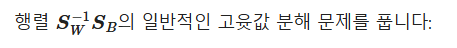

In [25]:
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

In [26]:
# 고윳값의 역순으로 고유 벡터를 정렬합니다(판별 벡터의 개수 = 클래스 개수 - 1):

In [27]:

# (고윳값, 고유벡터) 튜플의 리스트를 만듭니다.
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]

# (고윳값, 고유벡터) 튜플을 큰 값에서 작은 값 순서대로 정렬합니다.
eigen_pairs = sorted(eigen_pairs, key=lambda k: k[0], reverse=True)

# 고윳값의 역순으로 올바르게 정렬되었는지 확인합니다.
print('내림차순의 고윳값:\n')
for eigen_val in eigen_pairs:
    print(eigen_val[0])

내림차순의 고윳값:

349.61780890599397
172.7615221897938
3.2778759481604224e-14
2.842170943040401e-14
2.6347620763320892e-14
2.6347620763320892e-14
1.7169492680170284e-14
1.7169492680170284e-14
1.674335053365994e-14
1.2740060380615559e-14
7.458378098449663e-15
4.7370485570543226e-15
3.6888431873149695e-15


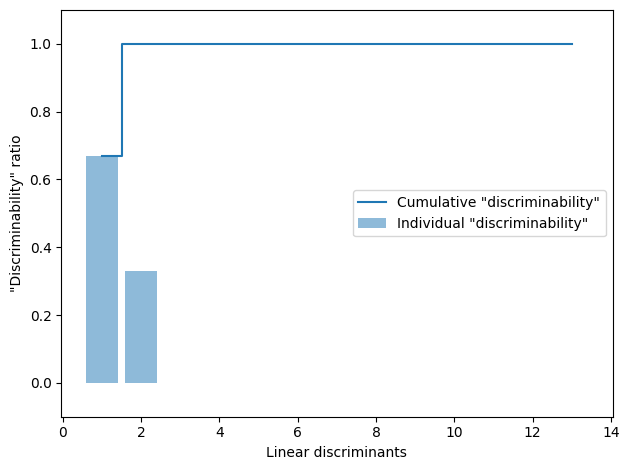

In [29]:
import matplotlib.pyplot as plt
tot = sum(eigen_vals.real)
discr = [(i / tot) for i in sorted(eigen_vals.real, reverse=True)]
cum_discr = np.cumsum(discr)

plt.bar(range(1, 14), discr, alpha=0.5, align='center',
        label='Individual "discriminability"')
plt.step(range(1, 14), cum_discr, where='mid',
         label='Cumulative "discriminability"')
plt.ylabel('"Discriminability" ratio')
plt.xlabel('Linear discriminants')
plt.ylim([-0.1, 1.1])
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('images/05_07.png', dpi=300)
plt.show()

<!-- 고윳값의 역순으로 고유 벡터를 정렬합니다(판별 벡터의 개수 = 클래스 개수 - 1): -->


In [30]:
# 변환 행렬 W

In [32]:
eigen_pairs[0][1][:, np.newaxis]

array([[-0.1481+0.j],
       [ 0.0908+0.j],
       [-0.0168+0.j],
       [ 0.1484+0.j],
       [-0.0163+0.j],
       [ 0.1913+0.j],
       [-0.7338+0.j],
       [-0.075 +0.j],
       [ 0.0018+0.j],
       [ 0.294 +0.j],
       [-0.0328+0.j],
       [-0.3547+0.j],
       [-0.3915+0.j]])

In [33]:
eigen_pairs[0][1][:, np.newaxis].real

array([[-0.1481],
       [ 0.0908],
       [-0.0168],
       [ 0.1484],
       [-0.0163],
       [ 0.1913],
       [-0.7338],
       [-0.075 ],
       [ 0.0018],
       [ 0.294 ],
       [-0.0328],
       [-0.3547],
       [-0.3915]])

In [31]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis].real,
              eigen_pairs[1][1][:, np.newaxis].real))
print('행렬 W:\n', w)

행렬 W:
 [[-0.1481 -0.4092]
 [ 0.0908 -0.1577]
 [-0.0168 -0.3537]
 [ 0.1484  0.3223]
 [-0.0163 -0.0817]
 [ 0.1913  0.0842]
 [-0.7338  0.2823]
 [-0.075  -0.0102]
 [ 0.0018  0.0907]
 [ 0.294  -0.2152]
 [-0.0328  0.2747]
 [-0.3547 -0.0124]
 [-0.3915 -0.5958]]


In [ ]:
# 새로운 특성 공간으로 샘플 투영하기

In [34]:
# X'=XW

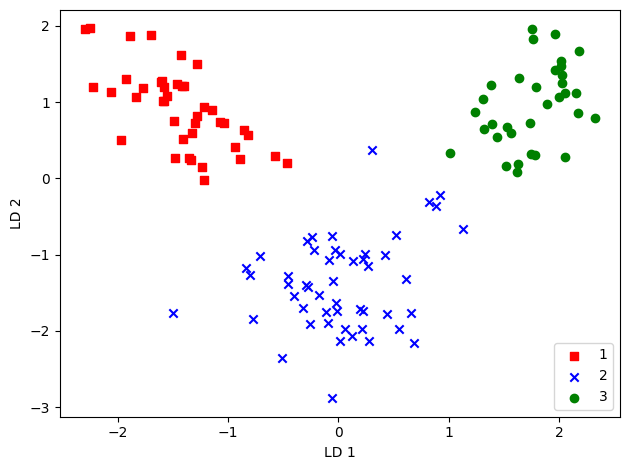

In [35]:

X_train_lda = X_train_std.dot(w)
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_lda[y_train == l, 0],
                X_train_lda[y_train == l, 1] * (-1),
                c=c, label=l, marker=m)

plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower right')
plt.tight_layout()
# plt.savefig('images/05_08.png', dpi=300)
plt.show()

In [36]:
# 사이킷런의 LDA

In [37]:

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)

In [39]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # 마커와 컬러맵을 준비합니다
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 결정 경계를 그립니다
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # 클래스별로 샘플을 그립니다
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.6,
                    color=cmap(idx),
                    edgecolor=None if idx==1 else 'black',
                    marker=markers[idx],
                    label=cl)

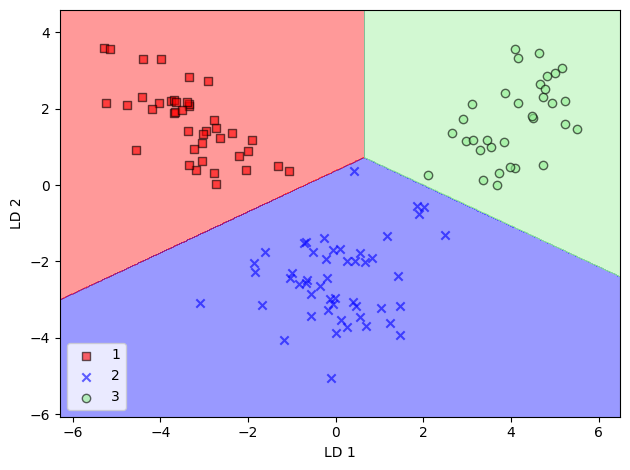

In [40]:

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=1)
lr = lr.fit(X_train_lda, y_train)

plot_decision_regions(X_train_lda, y_train, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('images/05_09.png', dpi=300)
plt.show()

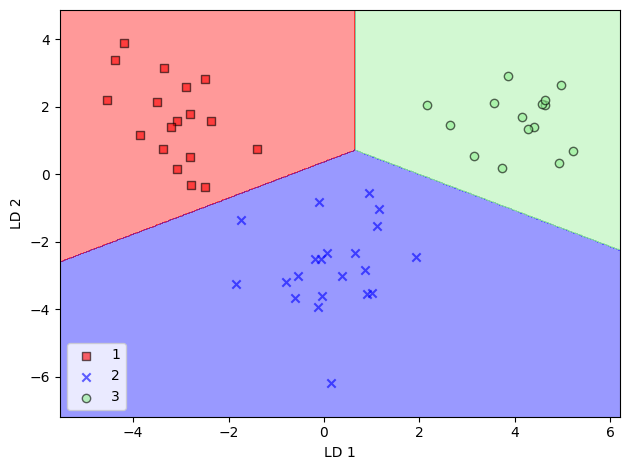

In [41]:

X_test_lda = lda.transform(X_test_std)

plot_decision_regions(X_test_lda, y_test, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('images/05_10.png', dpi=300)
plt.show()